In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv(r"C:\Users\noahs\Downloads\contacts.tsv", sep="\t")

In [3]:
df2=pd.read_csv(r"C:\Users\noahs\Downloads\searches.tsv", sep="\t")

In [5]:
#finding null values percent
df1.isna().sum()/len(df1)

id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64

In [6]:
#finding null values percent

df2.isna().sum()/len(df2)

ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64

In [17]:
df2

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN


In [15]:
df1.describe()

,n_guests,n_messages
count,7823.000000,7823.000000
mean,2.422600,6.319954
std,1.617347,6.472827
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,4.000000
75%,3.000000,8.000000
max,16.000000,102.000000


In [16]:
df2.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09


In [21]:
#On average, guests are searching for accommodations for approximately 7.67 nights.
#minium filter price user searcherd for is 1250
#75% of data has user searching for 5 nights and 25% data has user searching for 2 nights only
#The maximum maximum price filter for a search is approximately 1.07 billion.
#the min and max guest that are searcheing for rooms is 1 and 2 respectively, hence we can choose smaller accomidation

In [10]:
#Converting into datetime object 
df2["ds"] = pd.to_datetime(df2["ds"])
df2["ds_checkin"] = pd.to_datetime(df2["ds_checkin"])
df2["ds_checkout"] = pd.to_datetime(df2["ds_checkout"])


In [36]:
df2

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,month,day
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN,10.0,Thursday
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN,10.0,Thursday
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN,11.0,Saturday
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaT,NaT,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN,NaN,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaT,NaT,2,NaN,1,1,US,NaN,NaN,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN,11.0,Monday
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaT,NaT,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN,NaN,NaN


In [30]:
df1

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14
...,...,...,...,...,...,...,...,...,...,...,...
7818,ffe366f0-6ab6-4e94-818a-c69c125fed3c,8be6bf94-aeb3-4a51-8ac4-db60baedfea1,7732bad8-e800-49f3-8751-e7604e3fb5a3,2014-10-07 21:43:00.0,2014-10-08 08:19:33.0,2014-10-08 08:19:33.0,NaN,2014-10-17,2014-10-20,2,5
7819,ffe366f0-6ab6-4e94-818a-c69c125fed3c,b92639c1-a5a8-48f6-8484-4fe6f62d1c6d,cc3a6bd4-d64f-4cbe-b947-c36c3851b487,2014-10-13 15:38:28.0,2014-10-13 15:44:56.0,NaN,NaN,2014-10-17,2014-10-20,2,5
7820,ffe366f0-6ab6-4e94-818a-c69c125fed3c,d0b6d89a-4379-43f2-9560-4943df5b8f4f,6e5b4380-66d2-4f2a-8f89-d2794598997d,2014-10-13 15:40:49.0,2014-10-13 15:42:46.0,NaN,NaN,2014-10-17,2014-10-20,2,3
7821,ffe366f0-6ab6-4e94-818a-c69c125fed3c,f86bc9ab-e199-4254-8609-fd67d6aaed42,28caf371-6d1d-4e06-aaf1-e660966ac7a1,2014-10-07 21:30:31.0,2014-10-08 19:04:43.0,NaN,NaN,2014-10-17,2014-10-20,2,2


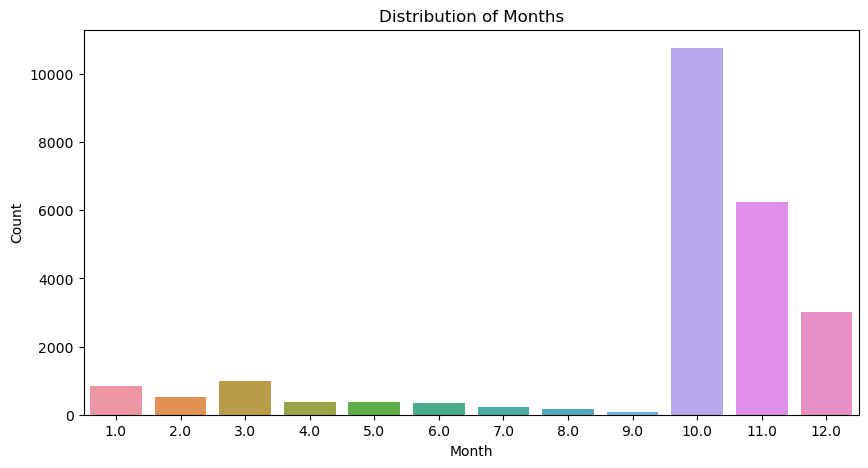

In [11]:


# Extracting month and day information
df2['month'] = df2['ds_checkin'].dt.month

df2['day'] = df2['ds_checkin'].dt.day_name()

# Create a count plot for months
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df2)

plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()




In [8]:
#so in the months of october there is highest searches followed november and december, so  better to increase the accomidations
#at that time

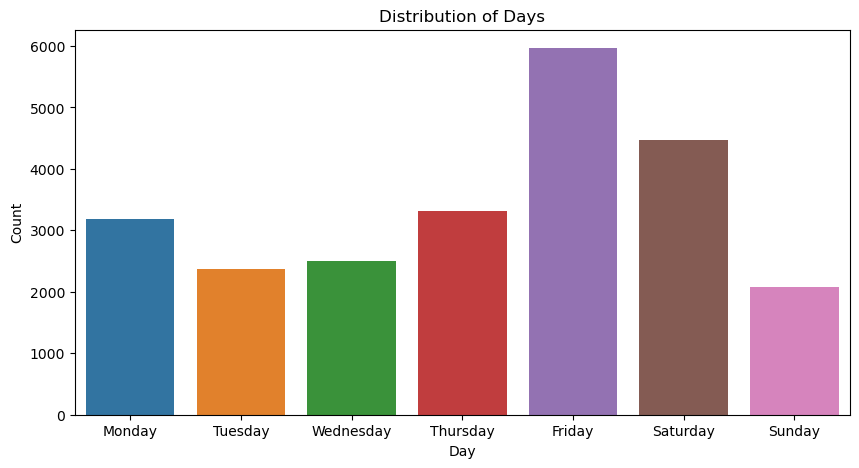

In [12]:
# Create a count plot for days
plt.figure(figsize=(10, 5))
sns.countplot(x='day', data=df2, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [14]:
#more rooms are searched on firday by the users, followed by saturday and thursday

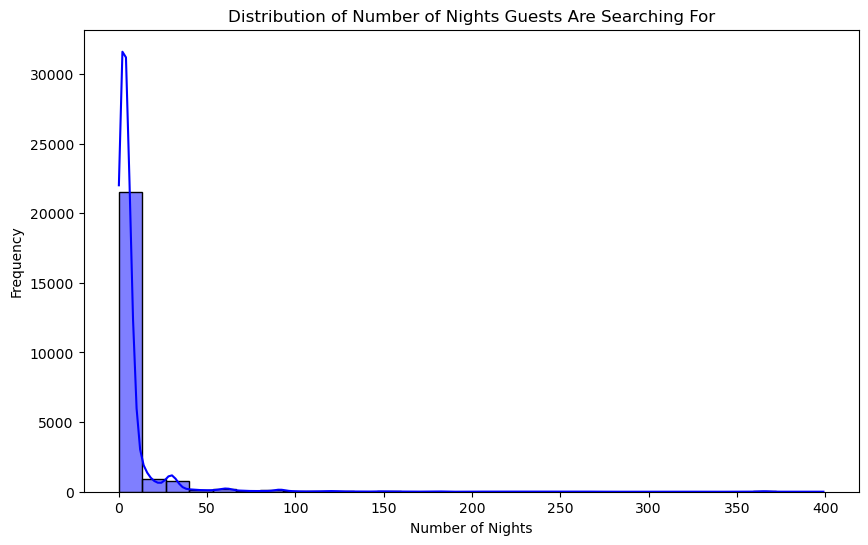

In [15]:
#Distribution of Number of Nights Guests Are Searching For
plt.figure(figsize=(10, 6))
sns.histplot(df2['n_nights'], bins=30, kde=True, color='blue')

plt.title('Distribution of Number of Nights Guests Are Searching For')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.show()


In [61]:
#more users are searching for fewer nights to stay

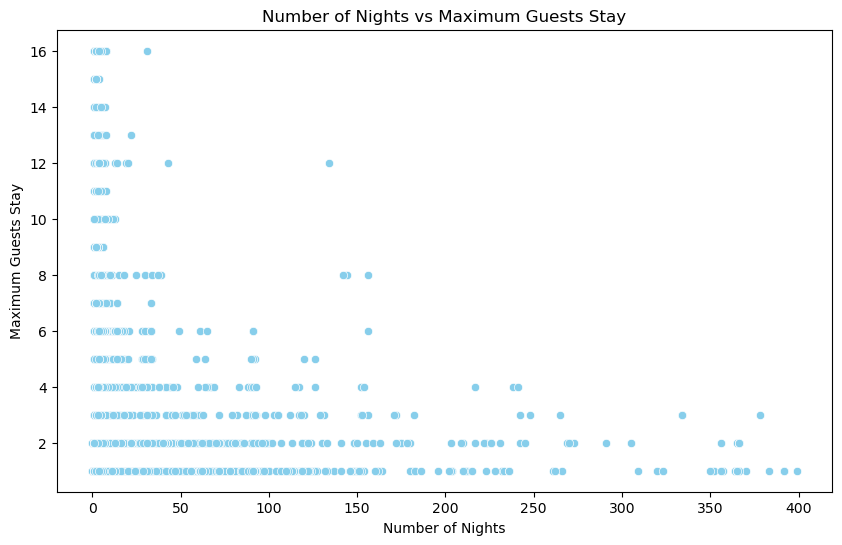

In [16]:
#plotting scatter plot for Number of Nights vs Maximum Guests Stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_nights', y='n_guests_max', data=df2, color='skyblue')

plt.title('Number of Nights vs Maximum Guests Stay')
plt.xlabel('Number of Nights')
plt.ylabel('Maximum Guests Stay')
plt.show()

In [17]:
df2[["n_nights","n_guests_max"]].corr(method="spearman")  

,n_nights,n_guests_max
n_nights,1.000000,-0.067821
n_guests_max,-0.067821,1.000000


In [5]:
#weak negitive corelarion is seen, which means as the number of nights increase the max guest choosen was decreasing, 
#so more number  of guest less likey they stay. we can also see in the scatter plot

In [23]:
df1.columns

Index(['id_guest', 'id_host', 'id_listing', 'ts_contact_at', 'ts_reply_at',
       'ts_accepted_at', 'ts_booking_at', 'ds_checkin', 'ds_checkout',
       'n_guests', 'n_messages'],
      dtype='object')

In [19]:
a=[]
for r,v in df1.iterrows():
    a.append(v['id_guest'])
    if v['id_host'] not in a:
        a.append(v['id_host'])
    if v['id_listing'] not in a:
        a.append(v['id_listing'])
        

In [20]:
len(a)

10547

In [21]:
acceptance=df1["ts_booking_at"].notna().sum()/len(a)*100

In [22]:
acceptance


20.612496444486585

In [54]:
#20.6% are the accepentace rate of different people searched for having room to actually having it

In [55]:
df2

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,month,day
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN,10.0,Thursday
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN,10.0,Thursday
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN,11.0,Saturday
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaT,NaT,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN,NaN,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaT,NaT,2,NaN,1,1,US,NaN,NaN,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN,11.0,Monday
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaT,NaT,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN,NaN,NaN


In [26]:
df1

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14
...,...,...,...,...,...,...,...,...,...,...,...
7818,ffe366f0-6ab6-4e94-818a-c69c125fed3c,8be6bf94-aeb3-4a51-8ac4-db60baedfea1,7732bad8-e800-49f3-8751-e7604e3fb5a3,2014-10-07 21:43:00.0,2014-10-08 08:19:33.0,2014-10-08 08:19:33.0,NaN,2014-10-17,2014-10-20,2,5
7819,ffe366f0-6ab6-4e94-818a-c69c125fed3c,b92639c1-a5a8-48f6-8484-4fe6f62d1c6d,cc3a6bd4-d64f-4cbe-b947-c36c3851b487,2014-10-13 15:38:28.0,2014-10-13 15:44:56.0,NaN,NaN,2014-10-17,2014-10-20,2,5
7820,ffe366f0-6ab6-4e94-818a-c69c125fed3c,d0b6d89a-4379-43f2-9560-4943df5b8f4f,6e5b4380-66d2-4f2a-8f89-d2794598997d,2014-10-13 15:40:49.0,2014-10-13 15:42:46.0,NaN,NaN,2014-10-17,2014-10-20,2,3
7821,ffe366f0-6ab6-4e94-818a-c69c125fed3c,f86bc9ab-e199-4254-8609-fd67d6aaed42,28caf371-6d1d-4e06-aaf1-e660966ac7a1,2014-10-07 21:30:31.0,2014-10-08 19:04:43.0,NaN,NaN,2014-10-17,2014-10-20,2,2


In [39]:
df2['filter_room_types'][0]

',Entire home/apt,Entire home/apt,Private room,Private room'

In [4]:
a=[]
for r,c in df2.iterrows():
    if pd.notna(c["filter_room_types"]):
        b=c['filter_room_types'].split(",")
        
        a.append(b)
        
        

In [5]:
a

[['', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Private room'],
 ['', 'Entire home/apt'],
 ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room'],
 ['Entire home/apt'],
 ['Entire home/apt'],
 ['', 'Entire home/apt'],
 ['', 'Entire home/apt'],
 ['', 'Shared room', 'Private room'],
 ['Entire home/apt',
  'Private room',
  'Shared room',
  'Private room',
  'Shared room'],
 ['', 'Entire home/apt'],
 ['', 'Entire home/apt'],
 ['Entire home/apt'],
 ['Entire home/apt'],
 ['Entire home/apt'],
 ['Entire home/apt'],
 ['Entire home/apt'],
 ['', 'Entire home/apt'],
 ['Entire home/apt'],
 ['', 'Entire home/apt'],
 ['', 'Entire home/apt'],
 ['', 'Entire home/apt'],
 ['Entire home/apt'],
 ['', 'Entire home/apt'],
 ['Private room'],
 ['', 'Entire home/apt'],
 ['Entire home/apt'],
 ['', 'Entire home/apt'],
 ['', 'Entire home/apt'],
 ['Entire home/apt'],
 ['', 'Entire home/apt'],
 ['Entire home/apt', 'Private room'],
 ['', 'Private room'],
 ['Entire home/apt'],
 ['', 'Entir

In [6]:
c=[]
for x in a:
    for y in x:
        if y!="":
            c.append(y)
    

In [7]:
roomtyp=pd.DataFrame(c, columns=["Room Type"])

In [12]:
roomtyp

,Room Type
0,Entire home/apt
1,Entire home/apt
2,Private room
3,Private room
4,Entire home/apt
...,...
22901,Entire home/apt
22902,Private room
22903,Entire home/apt
22904,Entire home/apt


<Axes: xlabel='Room Type', ylabel='count'>

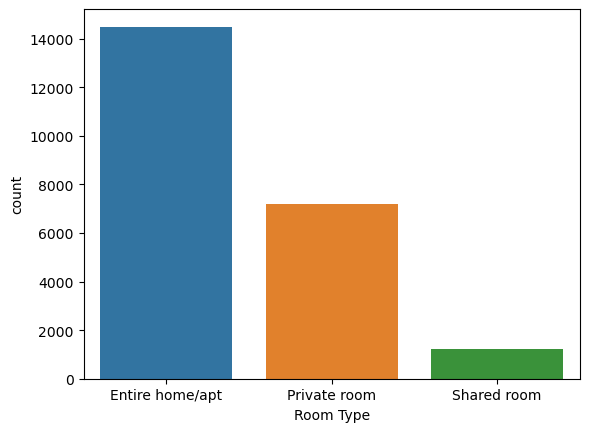

In [15]:
sns.countplot(data=roomtyp, x="Room Type")

In [21]:
df2["origin_country"].value_counts().head(10)

IE    6608
US    5811
GB    4832
FR    3444
IT    2333
DE    2170
ES    1759
CA    1085
AU     962
NL     843
Name: origin_country, dtype: int64

In [23]:
#These are the top 10 countries where the searches are made from